In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 3.9MB/s 


In [ ]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
from mtcnn import MTCNN
import cv2

image_path = '/test1.jpg'
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detections = detector.detect_faces(img)
detections

[{'box': [373, 85, 96, 126],
  'confidence': 0.9999923706054688,
  'keypoints': {'left_eye': (391, 133),
   'mouth_left': (389, 176),
   'mouth_right': (436, 182),
   'nose': (406, 172),
   'right_eye': (437, 141)}},
 {'box': [186, 69, 88, 116],
  'confidence': 0.999233603477478,
  'keypoints': {'left_eye': (208, 109),
   'mouth_left': (200, 148),
   'mouth_right': (245, 159),
   'nose': (220, 143),
   'right_eye': (252, 119)}}]

(-0.5, 639.5, 426.5, -0.5)

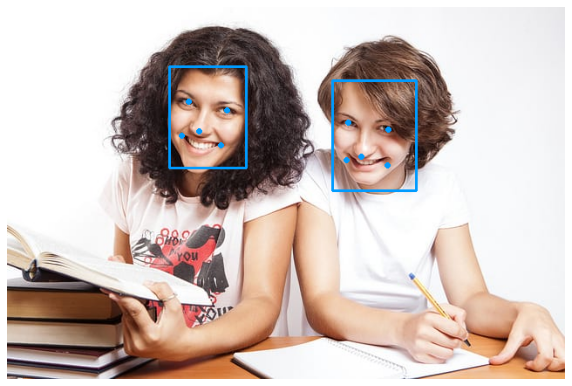

In [ ]:
import matplotlib.pyplot as plt

img_with_dets = img.copy()
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img_with_dets, (x,y), (x+width,y+height), (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_right']), 2, (0,155,255), 2)
plt.figure(figsize = (10,10))
plt.imshow(img_with_dets)
plt.axis('off')